In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

## Loading and Exploring the Dataset

The iris dataset is an extremely common dataset used in studying statistics and machine learning.  Here, we're going to load in the dataset, split it into training and testing sets, and poke around at its properties.

In [12]:
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

(50, 4)


## Visualizing the Data

Since we know we're going to be using decision trees, it's worth looking at the data visually to see if decision trees might make sense.  Here, we're going to use a scatter plot to look at the training data.

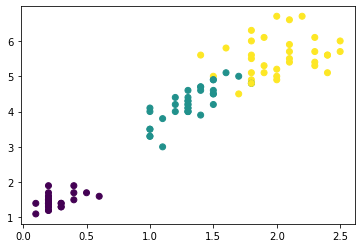

In [16]:
plt.scatter(X_train[:,3], X_train[:,2], c=y_train)

## Creating a Decision Tree

In class, we talked about the criterion for splitting being information gain based on entropy.  Here, we're going to create a scikit-learn decision tree using entropy as the criterion. 

In [17]:
clf = tree.DecisionTreeClassifier(criterion="entropy")

## Training the Decision Tree

We're ready to train the model now and see how it's doing! In scikit-learn, we use fit() to train the classifier.  Once we've done that, we can use predict() and accuracy_score() to see how it did on the training set.

In [23]:
clf.fit(X_train, y_train)
y_predict = clf.predict(X_train)
print(accuracy_score(y_train,y_predict))

1.0


## Testing the Decision Tree

We can now check to see how it does on the testing set! Did it actually learn something?

In [24]:
y_predict = clf.predict(X_test)
print(accuracy_score(y_test,y_predict))

0.98


## Visualizing the Decision Tree

We can create a figure depicting the decision tree that scikit-learn created.

[Text(0.4444444444444444, 0.9285714285714286, 'X[2] <= 2.45\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.3333333333333333, 0.7857142857142857, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5555555555555556, 0.7857142857142857, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.3333333333333333, 0.6428571428571429, 'X[2] <= 5.35\nentropy = 0.485\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.2222222222222222, 0.5, 'X[3] <= 1.45\nentropy = 0.31\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.1111111111111111, 0.35714285714285715, 'entropy = 0.0\nsamples = 26\nvalue = [0, 26, 0]'),
 Text(0.3333333333333333, 0.35714285714285715, 'X[1] <= 2.6\nentropy = 0.722\nsamples = 10\nvalue = [0, 8, 2]'),
 Text(0.2222222222222222, 0.21428571428571427, 'X[0] <= 6.15\nentropy = 0.918\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.1111111111111111, 0.07142857142857142, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.3333333333333333, 0.0714285714

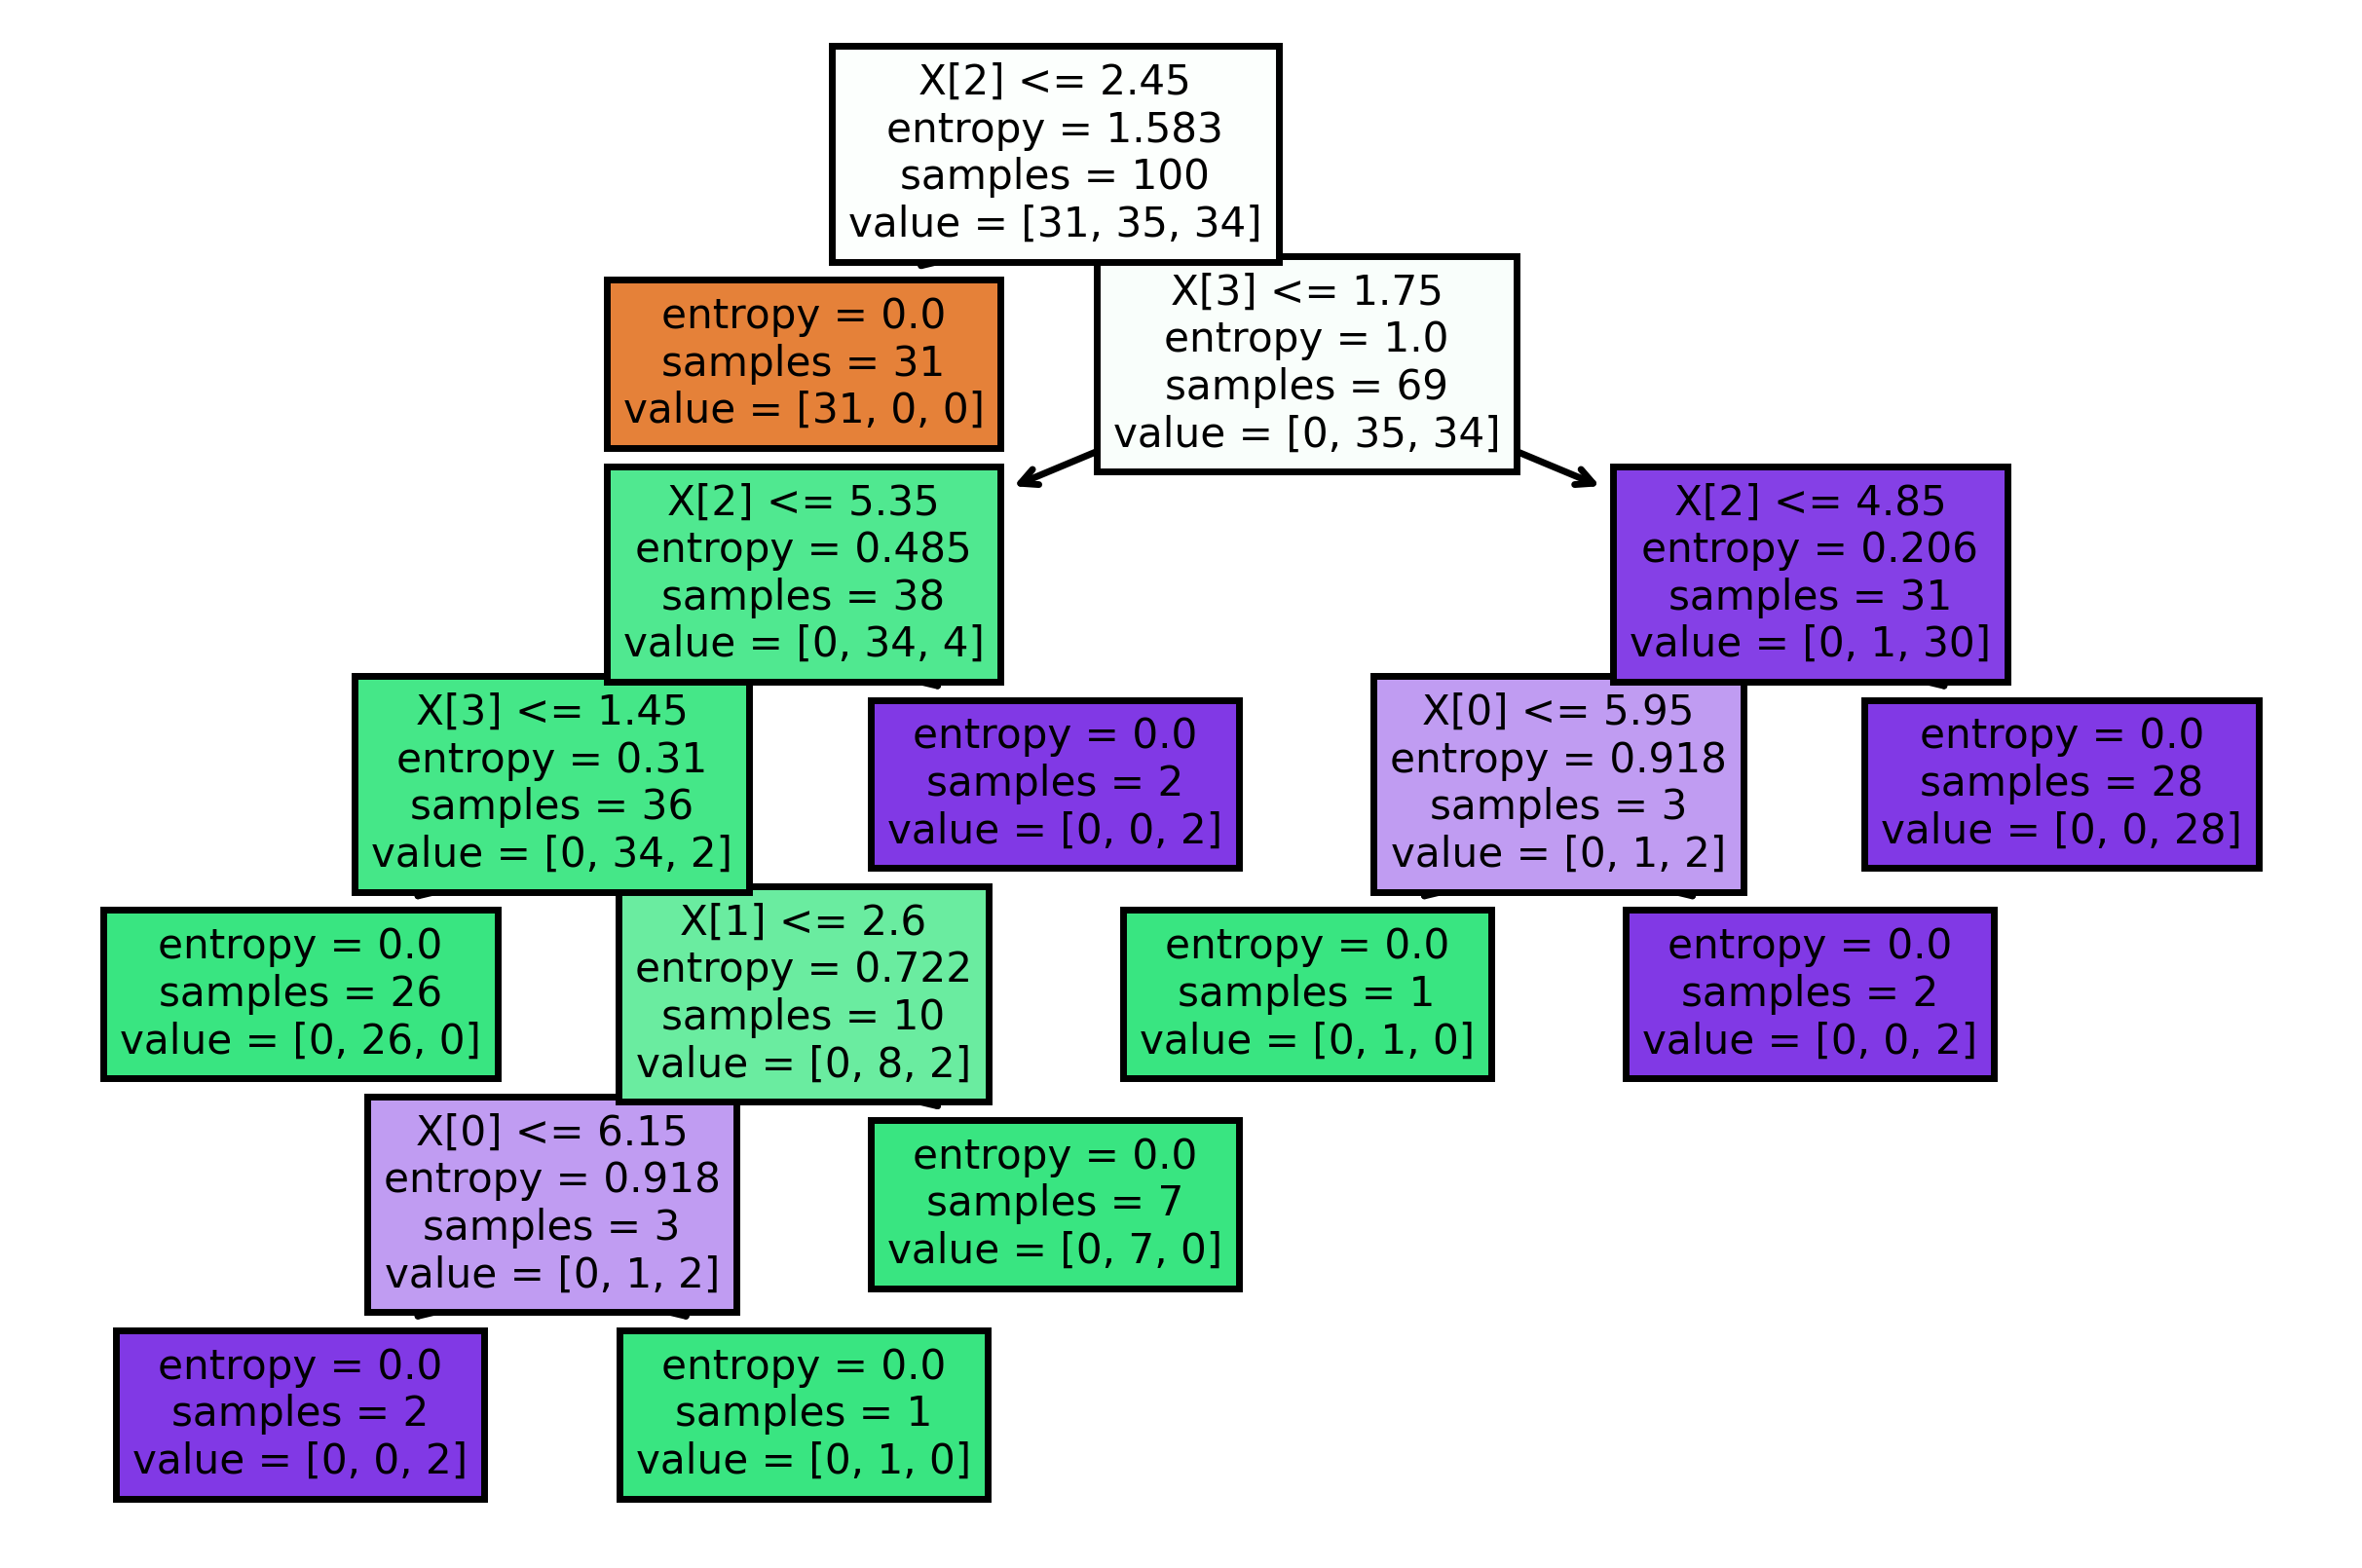

In [26]:
plt.figure(dpi=500)
tree.plot_tree(clf,filled=True)

## Printing the Decision Tree

We can also print the decision tree in text to further examine it.  This can be especially useful if your decision tree is too large to be visually inspected like that above.

In [27]:
print(tree.export_text(clf))

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 5.35
|   |   |   |--- feature_3 <= 1.45
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.45
|   |   |   |   |--- feature_1 <= 2.60
|   |   |   |   |   |--- feature_0 <= 6.15
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_0 >  6.15
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  2.60
|   |   |   |   |   |--- class: 1
|   |   |--- feature_2 >  5.35
|   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_0 <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  5.95
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



### Let's explore the parameters of decision trees

To the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)! 